In [1]:
import pandas as pd
data_K = pd.read_csv('Finalized_Trail_paths.csv')
data_K['type_factor']= data_K['type_factor'].map({0:'easy', 0.1:'medium', 0.3:'hard'})
data_K

,Unit,site_name,latitude,longitude,address,phone,website,description,amenities,Name,...,type_factor,Foot,Horse,Bike,Snowmb,Accessible,Shape_Leng,Elevation_Gain,Angle_of_Descent,DR
0,Allegany,Allegany State Park - Quaker Area,42.038990,-78.843833,"2373 ASP, Rte 1Salamanca, NY 14779",(716) 354-2182,https://parks.ny.gov/parks/1,The Quaker area is known for its two lakes and...,"Boat Launches, Camper Assistance Program, Camp...",ASP 1,...,easy,Y,Y,N,Y,N,2762.553239,38.980042,0.808398,0.777134
1,Allegany,Allegany State Park - Quaker Area,42.038990,-78.843833,"2373 ASP, Rte 1Salamanca, NY 14779",(716) 354-2182,https://parks.ny.gov/parks/1,The Quaker area is known for its two lakes and...,"Boat Launches, Camper Assistance Program, Camp...",ASP1,...,easy,Y,N,Y,Y,N,11247.667588,230.279968,1.172886,1.451551
2,Allegany,Allegany State Park - Quaker Area,42.038990,-78.843833,"2373 ASP, Rte 1Salamanca, NY 14779",(716) 354-2182,https://parks.ny.gov/parks/1,The Quaker area is known for its two lakes and...,"Boat Launches, Camper Assistance Program, Camp...",Bay State Rd,...,easy,Y,Y,N,N,N,1599.398857,18.770050,0.672375,0.507771
3,Allegany,Allegany State Park - Quaker Area,42.038990,-78.843833,"2373 ASP, Rte 1Salamanca, NY 14779",(716) 354-2182,https://parks.ny.gov/parks/1,The Quaker area is known for its two lakes and...,"Boat Launches, Camper Assistance Program, Camp...",Bay State Rd,...,easy,Y,Y,N,Y,N,722.157056,20.960052,1.662499,0.319747
4,Allegany,Allegany State Park - Quaker Area,42.038990,-78.843833,"2373 ASP, Rte 1Salamanca, NY 14779",(716) 354-2182,https://parks.ny.gov/parks/1,The Quaker area is known for its two lakes and...,"Boat Launches, Camper Assistance Program, Camp...",Bay State Rd,...,easy,Y,Y,N,Y,N,5830.772003,253.869904,2.493065,1.297291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,Thousand Islands,Whetstone Gulf State Park,43.702629,-75.459938,"6065 West Rd.Lowville, NY 13367",(315) 376-6630,https://parks.ny.gov/parks/92,Know Before You Go...More InfoPet PolicyA maxi...,"Fishing, Grills, Hiking, Hunting, Pavilions an...",North Rim Gorge Tail,...,medium,Y,N,N,N,N,3378.218496,65.474701,1.110335,1.019653
1878,Thousand Islands,Whetstone Gulf State Park,43.702629,-75.459938,"6065 West Rd.Lowville, NY 13367",(315) 376-6630,https://parks.ny.gov/parks/92,Know Before You Go...More InfoPet PolicyA maxi...,"Fishing, Grills, Hiking, Hunting, Pavilions an...",North Rim Gorge Tail,...,medium,Y,N,N,Y,N,1032.669680,94.932037,5.252367,0.775353
1879,Thousand Islands,Whetstone Gulf State Park,43.702629,-75.459938,"6065 West Rd.Lowville, NY 13367",(315) 376-6630,https://parks.ny.gov/parks/92,Know Before You Go...More InfoPet PolicyA maxi...,"Fishing, Grills, Hiking, Hunting, Pavilions an...",Observation Tower Trail,...,medium,Y,N,N,N,N,273.318398,50.888458,10.546989,0.320660
1880,Thousand Islands,Whetstone Gulf State Park,43.702629,-75.459938,"6065 West Rd.Lowville, NY 13367",(315) 376-6630,https://parks.ny.gov/parks/92,Know Before You Go...More InfoPet PolicyA maxi...,"Fishing, Grills, Hiking, Hunting, Pavilions an...",South Rim Gorge Trail,...,medium,Y,N,N,N,N,4268.759962,161.962860,2.172842,1.237958


In [6]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

class TrailKMeansClustering(BaseEstimator, TransformerMixin):
    
    def __init__(self, n_clusters=2, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.pipeline = Pipeline([
            ('onehotencode', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
            #('scaler', StandardScaler()),
             ('scaler', MinMaxScaler()),
            ('kmeans', KMeans(n_clusters=self.n_clusters, n_init= 20, random_state=self.random_state))
        ])
        self.regression_model = RandomForestRegressor()
    
    def fit(self, X, y=None):
        distortions = []

        for i in range(1,11):
            self.pipeline.named_steps['kmeans'].set_params(n_clusters=i)
            self.pipeline.fit(X)
            distortions.append(self.pipeline.named_steps['kmeans'].inertia_)
        plt.plot(range(1,11), distortions, marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('Distortion')
        plt.show()
        self.pipeline.named_steps['kmeans'].set_params(n_clusters=self.n_clusters)
        # Train regression model on cluster labels and target variable
        #self.regression_model.fit(self.pipeline.predict(X).reshape(-1,1), y)
        #return self
        return self.pipeline.fit(X)
    
    def transform(self, X, y=None):
        return self.pipeline.predict(X).reshape(-1,1)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
    
    def get_params(self, deep=True):
        return {"n_clusters": self.n_clusters, "random_state": self.random_state}
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def get_cluster_centers(self):
        return self.pipeline.named_steps['kmeans'].cluster_centers_

    def plot_clusters(self, X):
        labels = self.pipeline.predict(X)
        centers = self.pipeline.named_steps['kmeans'].cluster_centers_
        print(labels)
        #plt.scatter((X['Shape_Leng']/1609), X['Elevation_Gain'], c=labels, s=50, cmap='viridis', label = labels)
        n_clusters = len(np.unique(labels))
        cmap = plt.cm.get_cmap('viridis', n_clusters)
        fig, ax = plt.subplots()
        #cmap = plt.colormaps.get_cmap()
        for i in range(n_clusters):
             ax.scatter((X['Shape_Leng'][labels==i])/1609 , X['Elevation_Gain'][labels==i], c=cmap(i), s=50, cmap=cmap, label=f'Cluster {i}')
        ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, label='centroids')
        #plt.xlabel('Length')
        ax.set_xlabel('Length(miles)')
        #plt.ylabel('Elevation Gain')
        ax.set_ylabel('Elevation Gain (meters)')
        #plt.legend()
        ax.legend()
        #plt.title('Trail Clusters')
        ax.set_title('Trail Cluster')
        plt.show()
    def cluster_regression(self, X):
        labels = self.pipeline.predict(X)
        # Predict target variable using regression model
        return self.regression_model.predict(labels.reshape(-1, 1))

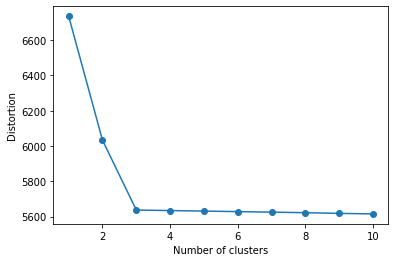

Pipeline(steps=[('onehotencode',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
                ('scaler', MinMaxScaler()),
                ('kmeans', KMeans(n_clusters=3, n_init=20, random_state=42))])

In [7]:
trail_kmeans = TrailKMeansClustering(n_clusters=3, random_state=42)
X = data_K[['Shape_Leng', 'Elevation_Gain', 'Angle_of_Descent', 'type_factor']]
trail_kmeans.fit(X)

In [8]:
cluster_labels = trail_kmeans.transform(X)
cluster_labels

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [2]], dtype=int32)

[1 1 1 ... 0 0 2]


<ipython-input-6-f867032b459e>:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', n_clusters)
<ipython-input-6-f867032b459e>:69: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter((X['Shape_Leng'][labels==i])/1609 , X['Elevation_Gain'][labels==i], c=cmap(i), s=50, cmap=cmap, label=f'Cluster {i}')
<ipython-input-6-f867032b459e>:69: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter((X['Shape_Leng'][labels==i])/1609 , X['Elevation_Gain'][labels==i]

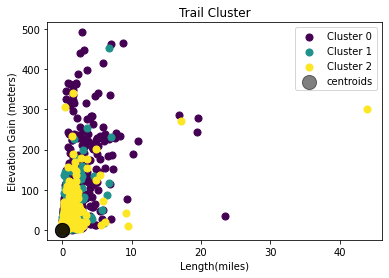

In [9]:
trail_kmeans.plot_clusters(X)